In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
path="/content/drive/MyDrive/Dataset/dataset - netflix1 (1).csv"
df=pd.read_csv(path)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


** REPLACING MISSING VALUES**

In [6]:
df.fillna(df.mean(), inplace=True)

<ipython-input-6-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

**REMOVING OUTLIERS**

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def remove_outliers_zscore(df, threshold=3):
  z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
  df_no_outliers = df[(z_scores < threshold).all(axis=1)]
  return df_no_outliers

threshold = 3
df_no_outliers = remove_outliers_zscore(df, threshold)

print(df_no_outliers)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

In [11]:
df_no_outliers.to_csv("cleaned_dataset.csv", index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20799 (\N{CJK UNIFIED IDEOGRAPH-513F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

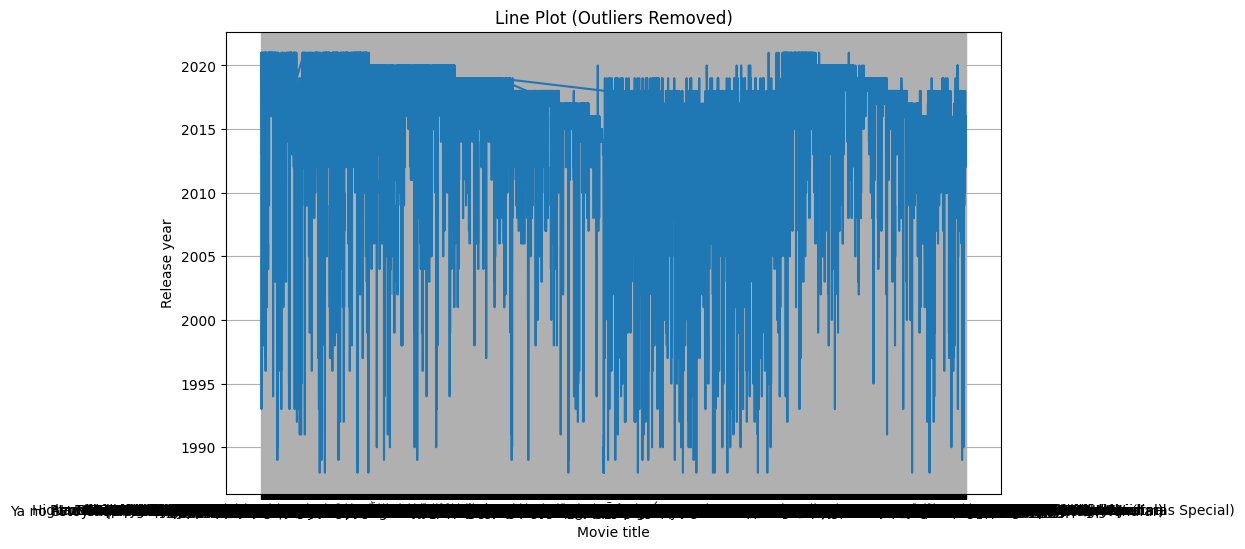

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define the remove_outliers_zscore function
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

# Load your dataset or use your existing DataFrame
path="/content/drive/MyDrive/Dataset/dataset - netflix1 (1).csv"
df=pd.read_csv(path)

# Assuming you have already loaded your dataset, you can call the function as follows:
threshold = 3
df_no_outliers = remove_outliers_zscore(df, threshold)

# Plot a line graph with the cleaned data
plt.figure(figsize=(10, 6))
plt.plot(df_no_outliers['title'], df_no_outliers['release_year'])
plt.xlabel('Movie title')
plt.ylabel('Release year')
plt.title('Line Plot (Outliers Removed)')
plt.grid(True)
plt.show()
